# Theme of this notebook - How to calculate β
* E.g., Estimate the β between AAPL and S&P 500 using monthly data from 2018M1 to 2022M12.

In [29]:
# First, retrive data from Yahoo Finance
# Before retriving data, pandas-datareader should be installed
! pip install pandas-datareader

In [30]:
# Import libraries
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib
import matplotlib.pyplot as plt
import yfinance as yf

# Retrive Apple's data from 2018M1 to 2022M12
apple = yf.download('AAPL', start='2018-01-01', end='2022-12-31', interval='1mo')
# Retrive S&P 500(^GSPC)'s data from 2018M1 to 2022M12
sp500 = yf.download('^GSPC',start='2018-01-01', end='2022-12-31', interval='1mo')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


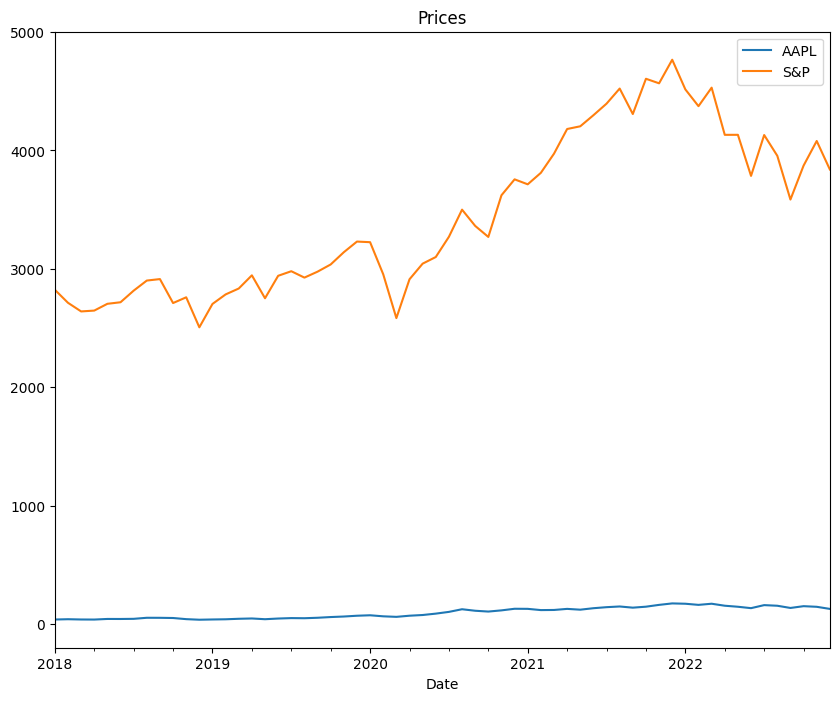

In [31]:
# Check the prices
plt.figure(figsize=(10,8))

apple['Adj Close'].plot(label='AAPL')
sp500['Adj Close'].plot(label='S&P')

plt.title('Prices')
plt.legend()

<Axes: ylabel='Frequency'>

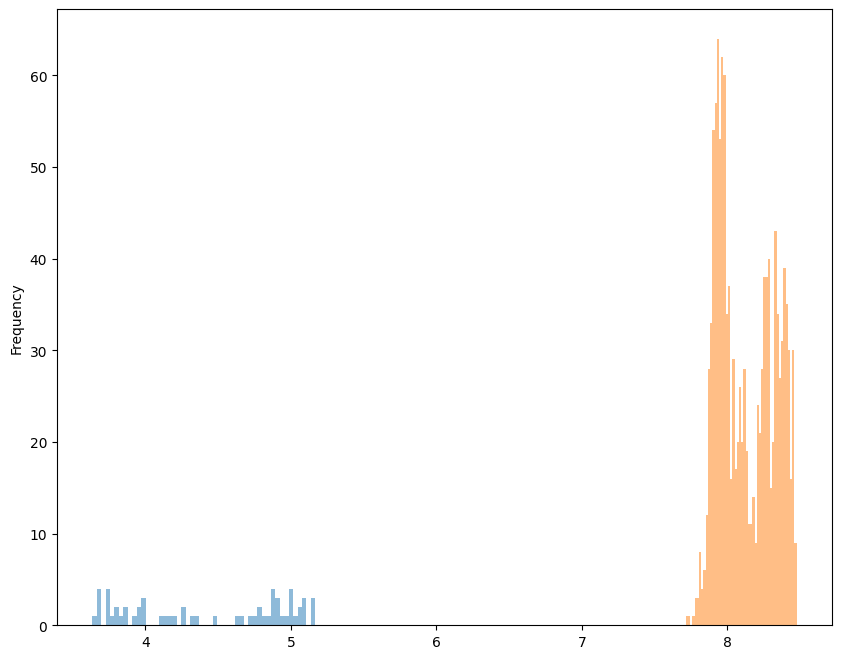

In [32]:
# Check the price
plt.figure(figsize=(10,8))

np.log(apple['Adj Close']).plot(kind='hist', bins=50, alpha=0.5)
np.log(benchmark['Adj Close']).plot(kind='hist', bins=50, alpha=0.5)

<ul>
  <li>Note, the <b>logarithmic return</b> of a security can be defined as follows $$r_{i,t} = ln(\frac{P_{i,t}}{P_{i,t-1}}),$$ where $P_{i,t}$ is the price of security $i$ at time $t$.</li>
</ul>

In [33]:
# Set DataFrame
apple = pd.DataFrame(apple.loc['2018-01-01':'2022-12-31', 'Adj Close'])
sp500 = pd.DataFrame(sp500.loc['2018-01-01':'2022-12-31', 'Adj Close'])
returns = pd.DataFrame()

In [34]:
# Calculate logarithmic returns
returns['AAPL_ret'] = np.log(apple['Adj Close'] / apple['Adj Close'].shift(1))
returns['S&P500_ret'] = np.log(sp500['Adj Close'] / sp500['Adj Close'].shift(1))
returns

,AAPL_ret,S&P500_ret
Date,,
2018-01-01,NaN,NaN
2018-02-01,0.061893,-0.039726
2018-03-01,-0.055735,-0.027252
2018-04-01,-0.015134,0.002715
2018-05-01,0.122893,0.021378
2018-06-01,-0.005614,0.004831
2018-07-01,0.027599,0.035388
2018-08-01,0.179172,0.029814
2018-09-01,-0.004836,0.004285


<Axes: xlabel='Date'>

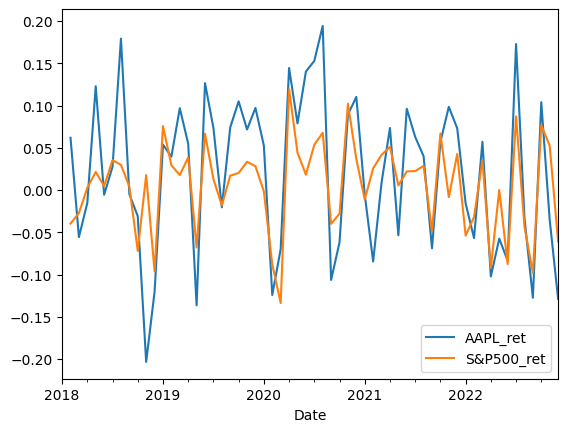

In [35]:
# Check a plot of returns
returns.plot()

In [36]:
# Calculate mean and volatility(= standard deviation)
mean_std = pd.DataFrame({'Mean': returns.mean(),
                        'Volatility': returns.std()})

mean_std

,Mean,Volatility
AAPL_ret,0.020052,0.092818
S&P500_ret,0.005208,0.054288


In [37]:
# Calculate correlation coefficient between AAPL and S&P 500
corr = returns.corr()
corr

,AAPL_ret,S&P500_ret
AAPL_ret,1.000000,0.728263
S&P500_ret,0.728263,1.000000


<ul>
  <li>Note, the <b>beta</b> between a security and market can be defined as the following formula:<br>
  <br>
  $\beta = \frac{\mathrm{Cov}{(r_m,r_i)}}{\sigma_m^2}$
  <br>
  or
  <br>
  $\beta = \rho_{(r_i,r_m)} * \frac{\sigma_i}{\sigma_m}$

  where:
  * $r_m$ is a return of a benchmark.
  * $r_i$ is a return of a security.
  * $\sigma_m$ is a volatility if the benchmark.
  * $\sigma_i$ is a volatility if the security.
  * $\mathrm{Cov}$ is a covariance.
  * $\rho$ is the correlation coefficient.
   </li>
</ul>

In [38]:
# Calculate β by using the second formula
rho = corr.iloc[0,1]
sigma_i = mean_std.iloc[0,1]
sigma_m = mean_std.iloc[1,1]
beta = rho * (sigma_i / sigma_m)

beta

1.2451456461161472

# Conclution
Beta between Apple and S&P500 from 2018M1 to 2022M12 is 1.2451...